In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load CSV files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define file paths for training and testing datasets
train_file_path = '/content/drive/My Drive/IDS Dataset 2/NF-ToN-IoT-V2_15000 samples_minmax_normalized_train.csv'
test_file_path = '/content/drive/My Drive/IDS Dataset 2/NF-ToN-IoT-V2_15000 samples_minmax_normalized_test.csv'

# Load the datasets into DataFrames
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Separate features and labels for training and testing datasets
X_train = train_data.iloc[:, :-2]  # All columns except the last two (labels)
y_train = train_data.iloc[:, -1]    # Last column (label names)

X_test = test_data.iloc[:, :-2]     # All columns except the last two (labels)
y_test = test_data.iloc[:, -1]       # Last column (label names)

Mounted at /content/drive


Attack
Benign        3270
scanning      2722
xss           2235
ddos          1645
password       930
injection      601
dos            585
backdoor        13
mitm             5
ransomware       4
Name: count, dtype: int64


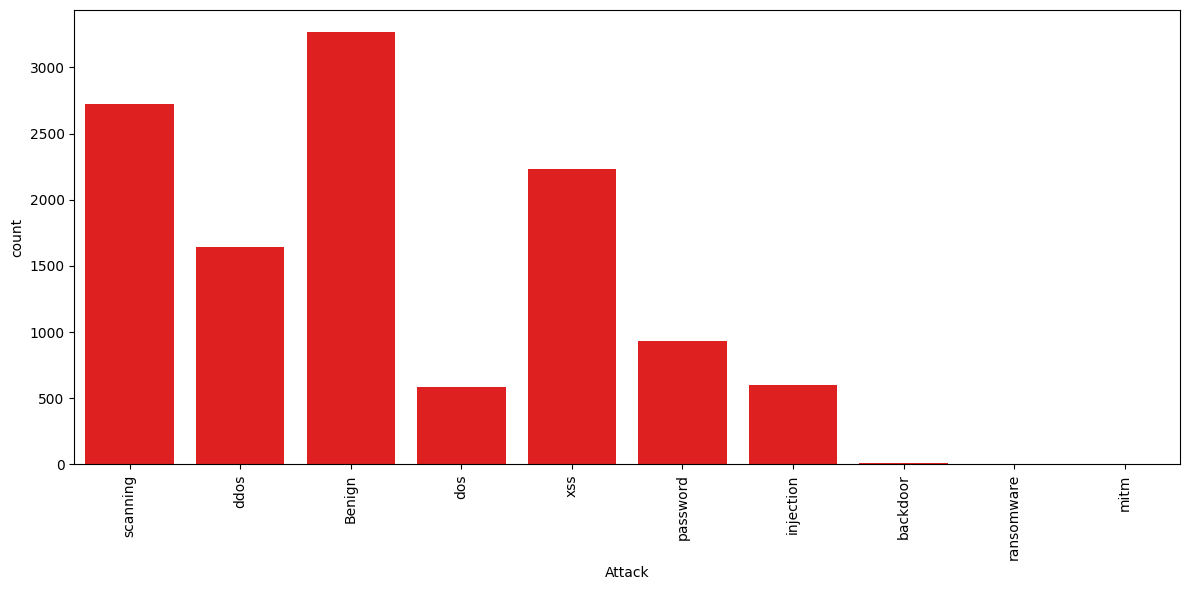

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

X = train_data.drop(['Attack'], axis=1)
y = train_data.loc[:, 'Attack']
print(train_data.loc[:, 'Attack'].value_counts())

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.countplot(data=train_data, x='Attack', color='red')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [3]:
X_train_nan_count = X_train.isna().sum().sum()
X_test_nan_count = X_test.isna().sum().sum()

print("Number of NaN values in X_train:", X_train_nan_count)
print("Number of NaN values in X_test:", X_test_nan_count)
print("Number of fearures:", X_train.shape[1])

Number of NaN values in X_train: 0
Number of NaN values in X_test: 0
Number of fearures: 41


In [4]:
!pip install scikit-learn
# Import the necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def GrdSrch_Tune(model, X, y, params):

    clf = GridSearchCV(model, params, scoring ='recall_weighted', cv = 5, n_jobs=-1)
    clf.fit(X, y)

    print("best score is :" , clf.best_score_)
    print("best estimator is :" , clf.best_estimator_)
    print("best Params is{} :" .format(clf.best_params_))

    return (clf.best_score_)

param_SVC = {
    'C': [0.1, 1, 10],               # Smaller range for regularization to control overfitting
    'kernel': ['linear', 'rbf','sigmoid'],      # Focus on linear and rbf, typically more effective for SVMs
    'gamma': [0.001, 0.01, 0.1, 1,'scale','auto']    # Lower range to prevent overfitting
}

# Now you can use SVC
svc = GrdSrch_Tune(SVC(random_state=42),X_train,y_train,param_SVC)

best score is : 0.8991673605328894
best estimator is : SVC(C=10, gamma=1, random_state=42)
best Params is{'C': 10, 'gamma': 1, 'kernel': 'rbf'} :


In [5]:
support_vector_classifier = SVC(C=10, gamma=1, kernel='rbf', random_state=42)
support_vector_classifier.fit(X_train, y_train)

SVC(C=10, gamma=1, random_state=42)

In [17]:
import time

# Start time
start_time = time.time()

y_pred_svc = support_vector_classifier.predict(X_test)

# End time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print(f"Execution time for SVM classifier: {execution_time:.5f} seconds")

y_pred_svc

Execution time for SVM classifier: 1.14313 seconds


array(['xss', 'scanning', 'password', ..., 'scanning', 'scanning',
       'Benign'], dtype=object)

In [7]:
#Compare actual y test V.S y_predict
df_rep_svc = pd.DataFrame({'actual data':y_test, 'predicted data':y_pred_svc})
df_rep_svc.head(10)

,actual data,predicted data
0,xss,xss
1,scanning,scanning
2,password,password
3,password,password
4,scanning,scanning
5,Benign,Benign
6,Benign,Benign
7,password,password
8,scanning,Benign
9,Benign,Benign


Text(0.5, 1.0, 'Confusion Matrix')

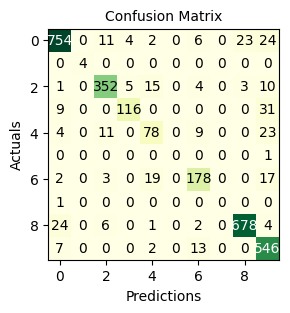

In [8]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

conf_svm = confusion_matrix(y_test,y_pred_svc)
fig, ax = plot_confusion_matrix(conf_mat=conf_svm,figsize=(3,3), cmap=plt.cm.YlGn)

plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)

In [9]:
from sklearn.model_selection import cross_val_score
scores_svc = cross_val_score(support_vector_classifier, X_train, y_train ,cv = 10, scoring = 'recall_weighted')
avg_scores_svc = scores_svc.mean()
avg_scores_svc

0.9017485428809326

In [10]:
from sklearn.model_selection import cross_val_score
scores_svc_test = cross_val_score(support_vector_classifier, X_test, y_test ,cv = 10, scoring = 'recall_weighted')
avg_scores_svc_test = scores_svc.mean()
avg_scores_svc_test

0.9017485428809326

In [11]:
print("Train score is:",format(avg_scores_svc))
print("Test score is:",format(avg_scores_svc_test))

Train score is: 0.9017485428809326
Test score is: 0.9017485428809326


In [12]:
# Import necessary libraries
import os
import joblib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path for the model and the folder name
model_folder = '/content/drive/My Drive/IDS models'
model_filename = 'NF-ToN-IoT-V2_support_vector_classifier.pkl'
model_path = os.path.join(model_folder, model_filename)

# Create the folder if it doesn't exist
if not os.path.exists(model_folder):
    os.makedirs(model_folder)

# Save the model to the specified path
joblib.dump(support_vector_classifier, model_path)

print(f'Model saved successfully at: {model_path}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved successfully at: /content/drive/My Drive/IDS models/NF-ToN-IoT-V2_support_vector_classifier.pkl
